# LDA Analysis, Case Study 1: Circuits

We will be exploring an LDA analysis of the "Compare Bulbs in Series, Revised" question, which asks students to compare the brightness of two bulbs when a battery is added in series. 

## I. Imports

In [1]:
# Print out all expressions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Wider Cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
# Ignore some warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning);

# General Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re as re
import pickle as pkl
import copy

# NLP Packages
# import gensim
# from gensim.parsing.preprocessing import STOPWORDS
# from gensim.corpora import Dictionary
# from gensim.models import LdaModel
# from gensim.models import CoherenceModel

# import nltk
# from nltk.corpus import wordnet
# from nltk import pos_tag

# Download NLTK data
# nltk.download('wordnet', quiet = True)
# nltk.download('punkt', quiet = True) 
# nltk.download('averaged_perceptron_tagger', quiet = True)
# nltk.download('omw-1.4', quiet = True)

import sys  
sys.path.insert(0, '..')
from scripts.lda_model import *

## II. Data Import and Restructuring

In [2]:
df = pd.read_csv('../data/compare_bulbs.csv', names = ['ID', 'resp'])
df.drop(columns = ['ID'], inplace = True)
df.head(5)

,resp
0,Circuit 2 has a larger battery that has a grea...
1,If the voltage is increased but resistance rem...
2,Current is equal to charge over time. Move vol...
3,An increase in voltage indicates an increase i...
4,Voltage is the change in electric potential. C...


## III. LDA Modeling

The following code will take the data processed above and convert it into a usable format for the LDA model. Before we start modeling, though, we need to set some parameters for our particular data. 

In [3]:
bigrams =               text_to_bigrams(df)
corpus =                bigrams_to_corpus(bigrams)

Let's take a look at some plots of the words used in the collection of student responses. 

Total words: 7952, unique words: 885


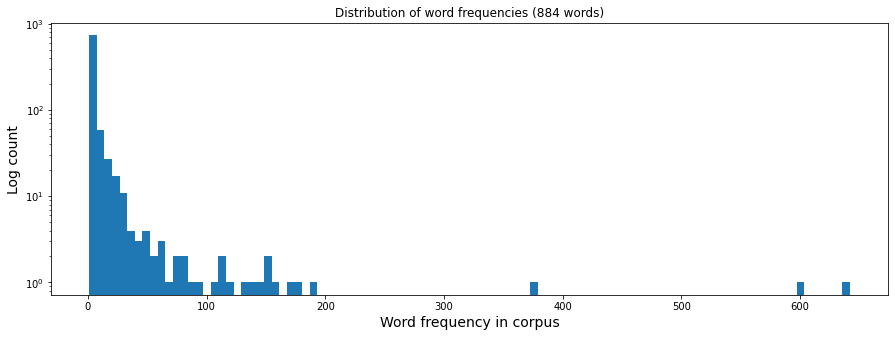

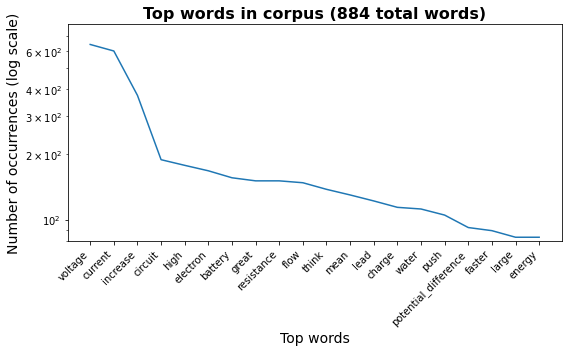

In [4]:
plot_words(corpus)

Let's now figure out the best thresholds for removing the most and least common words. A `no_above` threshold of 70% would remove words used in at least 70% of documents, and a `no_below` threshold of 3 would remove words used in only two or fewer documents. 

In [5]:
display_words_removed_at_thresholds(bigrams)


NO ABOVE THRESHOLDS


Dictionary with no_above=1 contains 885 unique words

Dictionary filtered with no_above=1.00 contains 885 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.90 contains 885 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.80 contains 885 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.70 contains 883 unique words. 2 words removed:
 ['current', 'voltage'] 

Dictionary filtered with no_above=0.60 contains 883 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.50 contains 883 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.40 contains 883 unique words. 0 words removed:
 [] 

Dictionary filtered with no_above=0.30 contains 882 unique words. 1 words removed:
 ['increase'] 

Dictionary filtered with no_above=0.20 contains 872 unique words. 10 words removed:
 ['battery', 'circuit', 'electron', 'flow', 'great', 'high', 'lead', 'mean', 'resistance', 'think

You can now set the desired threshold values based on this particular data set. 

In [6]:
no_above = 0.5
no_below = 3

In [7]:
bow, id2word= create_bow(corpus, bigrams, no_above, no_below, 
                         display_removed_words = False)

We can now proceed with the actual modeling process. Here, you can set a number of topics desired for the model, as well as the number of responses to display for each topic. By default, the number of responses displayed is three, but that can be overridden by setting a value. 

In [8]:
num_topics = 5
num_responses_displayed = 3

We'll now create the model and display representative student responses. By default, the number of responses displayed is three, but that can be changed in the first line of the code chunk.

In [9]:
model = LDA_model(bow, id2word, bigrams, 
                  num_topics = num_topics)
model.show_topics(num_words = 10, 
                  num_topics = num_topics)

Coherence of model with 5 topics: 0.4625408941484136




[(0,
  '0.090*"water" + 0.053*"large" + 0.053*"flow" + 0.044*"think" + 0.042*"energy" + 0.040*"pressure" + 0.028*"like" + 0.026*"great" + 0.023*"push" + 0.023*"electron"'),
 (1,
  '0.074*"electron" + 0.057*"force" + 0.044*"great" + 0.041*"high" + 0.038*"big" + 0.033*"mean" + 0.031*"faster" + 0.027*"potential" + 0.023*"push" + 0.022*"think"'),
 (2,
  '0.053*"increase" + 0.052*"high" + 0.050*"charge" + 0.039*"electron" + 0.033*"great" + 0.031*"battery" + 0.029*"lead" + 0.027*"flow" + 0.027*"mean" + 0.026*"potential_difference"'),
 (3,
  '0.081*"battery" + 0.069*"circuit" + 0.069*"power" + 0.048*"bulb" + 0.043*"increase" + 0.036*"brighter" + 0.029*"think" + 0.028*"push" + 0.024*"lead" + 0.022*"double"'),
 (4,
  '0.163*"increase" + 0.083*"resistance" + 0.048*"circuit" + 0.041*"constant" + 0.027*"equation" + 0.024*"mean" + 0.024*"bulb" + 0.024*"ir" + 0.022*"ohm_law" + 0.022*"change"')]

In [10]:
display_n_responses(df, num_responses_displayed, model, corpus, bow)

Topic 0: 0.090*"water" + 0.053*"large" + 0.053*"flow" + 0.044*"think" + 0.042*"energy" + 0.040*"pressure" + 0.028*"like" + 0.026*"great" + 0.023*"push" + 0.023*"electron"


,resp,0,1,2,3,4
219,"I use the metal model of a river or lake filled with water. Water flows through a river like current flows through circuits. If you think of potential difference in terms of a river or lake, when one end of the river is higher than the other the water flows more and with more current. There is a greater gravitational potential difference between the two river ends. It is the same with electricity, when the electric potential is greater, more current can flow. More electron are allowed to flow.",0.991588,0.0,0.0,0.0,0.0
460,"More voltage leads to more current, because if there is more potential (or, less accurately, pressure) for electron flow, and the resistance remains constant, more electrons will flow. An analogy would be putting your finger over a hose to create a pressurized stream. If you then crank the water up, more water will spray out, and it will spray out faster. I don't understand exactly what the question means by mental models, besides the water hose analogy given. My apologies if this isn't what was intended.",0.989432,0.0,0.0,0.0,0.0
401,"I think more voltage leads to more current because larger the change voltage the stronger the electric current. I use the mental model of a pressurized container or aircraft. If this aircraft is in an area of different pressure, and if there is a hull breach the air inside the craft will equalize outside. Depending on how much pressure there is compared to the outside it can be especially violent and quick. The difference in pressure in the example is the voltage, and the bigger the difference the stronger and more violent the cabin will equalize.",0.985066,0.0,0.0,0.0,0.0





Topic 1: 0.074*"electron" + 0.057*"force" + 0.044*"great" + 0.041*"high" + 0.038*"big" + 0.033*"mean" + 0.031*"faster" + 0.027*"potential" + 0.023*"push" + 0.022*"think"


,resp,0,1,2,3,4
101,"More voltage leads to more current because it has a higher potential. Think about the electrons like holding something off the ground. The object wants to be on the ground because it is pulled by gravity, giving it potential. This is the same for the electrons. The electrons want to be near the positive terminal so they too have potential. The more potential (the higher off the ground) means the more force there is pulling it to where it wants to be, which means there must be more electrons to flow.",0.0,0.990241,0.0,0.0,0.0
144,"Since voltage basically ""pulls"" electrons across the area of different potentials, more voltage basically results in a harder pull, and therefore the electrons speed up more. Since current is just a measure of how many electrons (or other charger carrier) move through an area every second, faster electrons will result in a higher current. Therefore, more voltage equals more current.",0.0,0.986311,0.0,0.0,0.0
313,"Because more voltage means a higher difference in potential (essentially, a longer 'fall', if comparing it to potential energy due to gravity), the electrons/particles will be moving faster at the end of the fall. Current is proportional to the speed of the electrons/particles moving, so faster movement correlates to a higher current.",0.0,0.984965,0.0,0.0,0.0





Topic 2: 0.053*"increase" + 0.052*"high" + 0.050*"charge" + 0.039*"electron" + 0.033*"great" + 0.031*"battery" + 0.029*"lead" + 0.027*"flow" + 0.027*"mean" + 0.026*"potential_difference"


,resp,0,1,2,3,4
157,"More voltage leads to more current because there exists a potential difference across the battery that must be matched through the circuit. This difference ""pushes"" the free electrons through the wire and resistor, creating what we call current. Since delta V must be matched between the battery and circuit, else a build up of charge resulting, more voltage must indicate more current if the resistance remains the same (this, again though, is by Ohm's Law). The relationship between voltage and current can also be understood through the context of electric fields and forces. The electric potential difference denoted on a battery is chemically generated by work done on electrons such that an electric dipole is generated. This dipole creates a net electric field around the circuit, which pushes already (randomly) moving electrons in a general direction - this creates drift velocity. The faster this drift velocity - as a result of a stronger E-field corresponding to more voltage - the more electrons pass through a certain cross section of the wire in a given amount of time. This is the very definition of current (delta Q / delta t). Ultimately, a greater voltage corresponds with a greater magnitude electric field. A greater magnitude electric field yields a larger drift velocity, which in turn increases the amount of charge that passes through a cross section of the circuit in any given amount of time - effectively, it increases the current (brightening the bulb).",0.0,0.0,0.996672,0.0,0.0
39,"The way that I think about this is that in order for the battery to maintain a certain potential difference between its terminals, it needs to generate an electric field that will ""push"" charges. In order to make the potential difference greater, this field needs to be stronger, which means it will ""push"" harder. Consequently, a stronger push means charges are going to move faster, and since current is the amount of charge moving past per unit time, faster moving charges means greater current.",0.0,0.0,0.993111,0.0,0.0
56,"The role of a battery is to maintain a fixed electric potential difference between its terminals. If the voltage of the battery increases, the potential difference that the battery must maintain increases. So, the battery must push more charge through it to maintain the voltage. Current is the amount of charge that flows per unit time. If the total amount of charge has increased, the current has also increased. I am visualizing the battery itself, and connecting the fact that increasing the voltage also increases the capacity of a battery to chemically react and release electrons.",0.0,0.0,0.992508,0.0,0.0





Topic 3: 0.081*"battery" + 0.069*"circuit" + 0.069*"power" + 0.048*"bulb" + 0.043*"increase" + 0.036*"brighter" + 0.029*"think" + 0.028*"push" + 0.024*"lead" + 0.022*"double"


,resp,0,1,2,3,4
339,I think about this in two ways. First in Circuit 1and 2 the Resistence is the same since they are Identical batteries. Since Circuit 2 has a second battery added it doubles the voltage. Since R is the same the I is force to increase. and Increasing the Current increases the power. The way I think about the Current increasing is one battery is producing a certain amount of current which so if you add another battery it will be looking at its V and the R producing more of a current. the total Current can be found by adding the two together.,0.0,0.0,0.0,0.988944,0.0
112,"In this scenario I think of the Voltage as the amount of current crossing a resistor. Although voltage does not flow like current the higher the voltage the more current will flow across the resistor because of ohm's law. As far as picturing the bulb brighter or dimmer, it is intuitive in my opinion that a brighter bulb represents more power and therefore more current. I also like to think of it as a lot of electrons flying through the filament in the buld making it glow and emit light.",0.0,0.0,0.0,0.987049,0.0
328,"Well since there is more power that goes through bulb 2, it should be brighter. I think of the electricity that goes through the circuits, and how powerful each one is. Circuit 1 has less voltage so I think of a small amount of electricity, while circuit 2 has fast, power surge of electricity.",0.0,0.0,0.0,0.982573,0.0





Topic 4: 0.163*"increase" + 0.083*"resistance" + 0.048*"circuit" + 0.041*"constant" + 0.027*"equation" + 0.024*"mean" + 0.024*"bulb" + 0.024*"ir" + 0.022*"ohm_law" + 0.022*"change"


,resp,0,1,2,3,4
280,"Because the resistance is the same in both circuit 1 and circuit 2, when the voltage is increased (as in circuit 2) the current must also proportionally increase, and thus the lightbulb will be brighter when voltage is increased. I just think about this in terms of the equation, so for example lets say the voltage in circuit 1 is V and the voltage in circuit 2 is 2V, and so the equation for the current in circuit 1 would be (V/R)=I and to get to circuit 2 you're basically just multiplying both sides by 2 (and keeping R constant) and you end up with (2V/R)=2I, and so the current proportionally increases with the voltage(the brightness of the bulb is dependent on the current flowing through it, so when the current increases, the brightness also increases).",0.0,0.0,0.0,0.0,0.992943
99,"Ohm's law states that the electrical current (I) flowing in an circuit is proportional to the voltage (V) and inversely proportional to the resistance (R). Therefore, if the voltage is increased, the current will increase provided the resistance of the circuit does not change. In a linear circuit of fixed resistance, if we increase the voltage, the current goes up, and similarly, if we decrease the voltage, the current goes down. This means that if the voltage is high the current is high, and if the voltage is low the current is low.",0.0,0.0,0.0,0.0,0.990879
411,"A higher voltage would result in a higher current, proven by rearranging the equation V=IR. I usually think about it in terms of the equation, sometime drawing arrows for each of the variable indicating how a change in one value affects the other. For this case I look at V and draw an up arrow, then can conclude that if R is constant, I must also increase.",0.0,0.0,0.0,0.0,0.987108
